# Importing necessary libraries

In [129]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa import holtwinters

# Loading dataset

In [130]:
df=pd.read_csv('C:/Users/bhavna singh/Downloads/weather_actuals.csv')
df1=pd.read_csv('C:/Users/bhavna singh/Downloads/power_actual.csv')
df2=pd.read_csv('C:/Users/bhavna singh/Downloads/weather_forecast.csv')

In [131]:
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head(10)

,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
5,1,2017-09-30 23:30:00,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
6,1,2017-10-01 00:30:00,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
7,1,2017-10-01 01:30:00,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
8,1,2017-10-01 02:30:00,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16
9,1,2017-10-01 03:30:00,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237,0.60,...,-9999.0,-9999.0,-9999.0,rain,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16


In [132]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 30 columns):
plant_id                13619 non-null int64
datetime_utc            13619 non-null object
datetime_local          13619 non-null object
cloud_cover             13619 non-null float64
apparent_temperature    13619 non-null float64
temperature             13619 non-null int64
humidity                13619 non-null int64
dew_point               13619 non-null float64
wind_bearing            13619 non-null int64
wind_speed              13619 non-null float64
wind_chill              3744 non-null float64
wind_gust               13619 non-null float64
heat_index              3744 non-null float64
pressure                13619 non-null float64
qpf                     3744 non-null float64
uv_index                13619 non-null int64
snow                    3744 non-null float64
pop                     3744 non-null float64
fctcode                 3744 non-null float64
ozone           

In [133]:
df.describe()

,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,...,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility
count,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,3744.0,13619.000000,...,3744.0,13619.000000,3744.0,3744.0,3744.0,13619.000000,3744.0,13619.000000,13619.000000,13619.000000
mean,1.0,-314.005310,25.944639,24.498054,0.537411,11.924626,-498.677363,-540.808704,-9999.0,-2393.184251,...,-9999.0,-2394.989280,-9999.0,-9999.0,-9999.0,-2187.730797,-9999.0,-2396.367775,-2396.398081,-117.086149
std,0.0,1744.610028,10.469808,8.840016,0.498617,9.129459,2557.943872,2267.247300,0.0,4270.333680,...,0.0,4269.320576,0.0,0.0,0.0,4385.706548,0.0,4268.545854,4268.528833,1130.763316
min,1.0,-9999.000000,3.140000,5.000000,0.000000,-20.560000,-9999.000000,-9999.000000,-9999.0,-9999.000000,...,-9999.0,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.0,-9999.000000,-9999.000000,-9999.000000
25%,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,79.000000,1.620000,-9999.0,1.185000,...,-9999.0,0.000000,-9999.0,-9999.0,-9999.0,236.900000,-9999.0,0.000000,0.000000,3.540000
50%,1.0,0.000000,25.540000,25.000000,1.000000,10.710000,149.000000,2.410000,-9999.0,3.070000,...,-9999.0,0.000000,-9999.0,-9999.0,-9999.0,270.800000,-9999.0,0.000000,0.000000,16.090000
75%,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,-9999.0,4.710000,...,-9999.0,2.000000,-9999.0,-9999.0,-9999.0,280.800000,-9999.0,0.000000,0.000000,16.090000
max,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,-9999.0,15.150000,...,-9999.0,12.000000,-9999.0,-9999.0,-9999.0,351.700000,-9999.0,6.220000,0.730000,16.090000


In [134]:
df.head()


,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [135]:
df1.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [136]:
df.drop('plant_id',axis=1,inplace=True)#because it's same in all rows

df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.head(10)

,datetime,ghi,gti,power
0,2017-10-01 00:00:00,0.0,0.0,0.0
1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2017-10-01 00:30:00,0.0,0.0,0.0
3,2017-10-01 00:45:00,0.0,0.0,0.0
4,2017-10-01 01:00:00,0.0,0.0,0.0
5,2017-10-01 01:15:00,0.0,0.0,0.0
6,2017-10-01 01:30:00,0.0,0.0,0.0
7,2017-10-01 01:45:00,0.0,0.0,0.0
8,2017-10-01 02:00:00,0.0,0.0,0.0
9,2017-10-01 02:15:00,0.0,0.0,0.0


# Exploratory data analysis

In [137]:
df.shape

df.isnull().sum()



datetime_utc               0
datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_chill              9875
wind_gust                  0
heat_index              9875
pressure                   0
qpf                     9875
uv_index                   0
snow                    9875
pop                     9875
fctcode                 9875
ozone                      0
precip_accumulation     9875
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
dtype: int64

In [138]:
df1.shape

(70080, 4)

In [139]:
df1.isnull().sum()

datetime        0
ghi         35040
gti         35040
power           0
dtype: int64

In [140]:
df1.drop(['ghi','gti'],axis=1,inplace=True)

df1.rename(columns={'datetime': 'datetime_local'}, inplace=True)

df.head()


,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [141]:
df.info()

df3= pd.merge(df, df1, how='left', on='datetime_local',left_index=True, right_index=True)

df3.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 29 columns):
datetime_utc            13619 non-null object
datetime_local          13619 non-null object
cloud_cover             13619 non-null float64
apparent_temperature    13619 non-null float64
temperature             13619 non-null int64
humidity                13619 non-null int64
dew_point               13619 non-null float64
wind_bearing            13619 non-null int64
wind_speed              13619 non-null float64
wind_chill              3744 non-null float64
wind_gust               13619 non-null float64
heat_index              3744 non-null float64
pressure                13619 non-null float64
qpf                     3744 non-null float64
uv_index                13619 non-null int64
snow                    3744 non-null float64
pop                     3744 non-null float64
fctcode                 3744 non-null float64
ozone                   13619 non-null float64
precip_accumul

,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,...,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at,power
0,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,...,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0
1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,...,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0
2,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,...,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0
3,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,...,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0
4,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,...,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0


In [142]:
df3.drop(['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation','precip_type','updated_at','datetime_utc'],inplace=True,axis=1)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 20 columns):
datetime_local          13619 non-null object
cloud_cover             13619 non-null float64
apparent_temperature    13619 non-null float64
temperature             13619 non-null int64
humidity                13619 non-null int64
dew_point               13619 non-null float64
wind_bearing            13619 non-null int64
wind_speed              13619 non-null float64
wind_gust               13619 non-null float64
pressure                13619 non-null float64
uv_index                13619 non-null int64
ozone                   13619 non-null float64
precip_intensity        13619 non-null float64
precip_probability      13619 non-null float64
visibility              13619 non-null float64
sunrise                 13619 non-null object
sunset                  13619 non-null object
icon                    13619 non-null object
summary                 13619 non-null object
power      

In [143]:
df3['datetime_local']=pd.to_datetime(df3['datetime_local'],infer_datetime_format=True) 
df3['sunrise']=pd.to_datetime(df3['sunrise'],infer_datetime_format=True)
df3['sunset']=pd.to_datetime(df3['sunset'],infer_datetime_format=True)

In [144]:
le=LabelEncoder()
df3['icon']=le.fit_transform(df3['icon'])

df3['summary']=le.fit_transform(df3['summary'])



df3.head()


,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,power
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,1007.90,-9999,-9999.0,-9999.0,-9999.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,1,1,0.0
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,3,2,0.0
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,3,2,0.0
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,-9999.0,1008.12,-9999,-9999.0,-9999.0,-9999.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,1,1,0.0
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,3,2,0.0


In [145]:

df3.describe()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,icon,summary,power
count,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,-314.005310,25.944639,24.498054,0.537411,11.924626,-498.677363,-540.808704,-2393.184251,-733.594065,-2394.989280,-2187.730797,-2396.367775,-2396.398081,-117.086149,2.157647,3.959248,3.194072
std,1744.610028,10.469808,8.840016,0.498617,9.129459,2557.943872,2267.247300,4270.333680,4018.429107,4269.320576,4385.706548,4268.545854,4268.528833,1130.763316,1.700788,3.942720,4.903338
min,-9999.000000,3.140000,5.000000,0.000000,-20.560000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000
25%,0.000000,17.310000,17.000000,0.000000,5.920000,79.000000,1.620000,1.185000,998.750000,0.000000,236.900000,0.000000,0.000000,3.540000,1.000000,1.000000,0.000000
50%,0.000000,25.540000,25.000000,1.000000,10.710000,149.000000,2.410000,3.070000,1006.900000,0.000000,270.800000,0.000000,0.000000,16.090000,2.000000,2.000000,0.000000
75%,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,3.000000,6.000000,6.090000
max,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,7.000000,18.000000,17.180000


# Outliers treatment 

In [146]:
df3['visibility']=df3['visibility'].apply(lambda x: np.NaN if x==-9999 else x)

df3['visibility'].fillna(df3['visibility'].mean(),inplace=True)

df3['uv_index']=df3['uv_index'].apply(lambda x: np.NaN if x==-9999 else x)

df3['uv_index'].fillna(df3['uv_index'].mean(),inplace=True)

df3['wind_gust']=df3['wind_gust'].apply(lambda x: np.NaN if x==-9999 else x)

df3['wind_gust'].fillna(df3['wind_gust'].mean(),inplace=True)

df3['precip_probability']=df3['precip_probability'].apply(lambda x: np.NaN if x==-9999 else x)

df3['precip_probability'].fillna(0,inplace=True)

df3['ozone']=df3['ozone'].apply(lambda x: np.NaN if x==-9999 else x)

df3['ozone'].fillna(df3['ozone'].mean(),inplace=True)

df3['precip_intensity']=df3['precip_intensity'].apply(lambda x: np.NaN if x==-9999 else x)

df3['precip_intensity'].fillna(df3['precip_intensity'].mean(),inplace=True)

df3['wind_bearing']=df3['wind_bearing'].apply(lambda x: np.NaN if x==-9999 else x)

df3['wind_bearing'].fillna(df3['wind_bearing'].mean(),inplace=True)

df3['wind_speed']=df3['wind_speed'].apply(lambda x: np.NaN if x==-9999 else x)

df3['wind_speed'].fillna(df3['wind_speed'].mean(),inplace=True)

df3['pressure']=df3['pressure'].apply(lambda x: np.NaN if x==-9999 else x)

df3['pressure'].fillna(df3['pressure'].mean(),inplace=True)

df3['cloud_cover']=df3['cloud_cover'].apply(lambda x: np.NaN if x==-9999 else x)

df3['cloud_cover'].fillna(df3['cloud_cover'].mean(),inplace=True)

In [147]:
le=LabelEncoder()
df3['icon']=le.fit_transform(df3['icon'])
df3['summary']=le.fit_transform(df3['summary']) 

df3.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,power
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.000000,0.83000,4.245261,1007.900000,1.87127,274.459707,0.058259,0.0,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,1,1,0.0
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,188.786929,2.63889,4.245261,1009.074974,1.87127,274.459707,0.058259,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,3,2,0.0
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,188.786929,2.63889,4.245261,1009.074974,1.87127,274.459707,0.058259,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,3,2,0.0
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.000000,0.45000,4.245261,1008.120000,1.87127,274.459707,0.058259,0.0,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,1,1,0.0
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,188.786929,2.63889,4.245261,1009.074974,1.87127,274.459707,0.058259,0.0,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,3,2,0.0


In [148]:
sc=StandardScaler()
df3[['cloud_cover', 'apparent_temperature',
       'temperature', 'humidity', 'dew_point', 'wind_bearing', 'wind_speed',
       'wind_gust', 'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'visibility','icon',
       'summary']]=sc.fit_transform(df3[['cloud_cover', 'apparent_temperature',
       'temperature', 'humidity', 'dew_point', 'wind_bearing', 'wind_speed',
       'wind_gust', 'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'visibility','icon',
       'summary']])

C:\Users\bhavna singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\bhavna singh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Testing model accuuracy within same dataset

In [149]:
train=df3[0:int(len(df3)*0.8)]
test=df3[int(len(df3)*0.8):]

# Naive approach

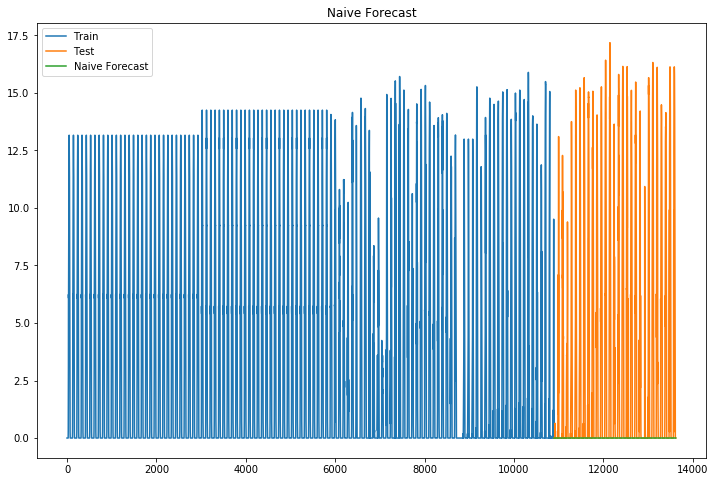

In [150]:
dd= np.asarray(train.power)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['power'], label='Train')
plt.plot(test.index,test['power'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [151]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.power, y_hat.naive))
print(rms)

6.15899451204599


# Simple average

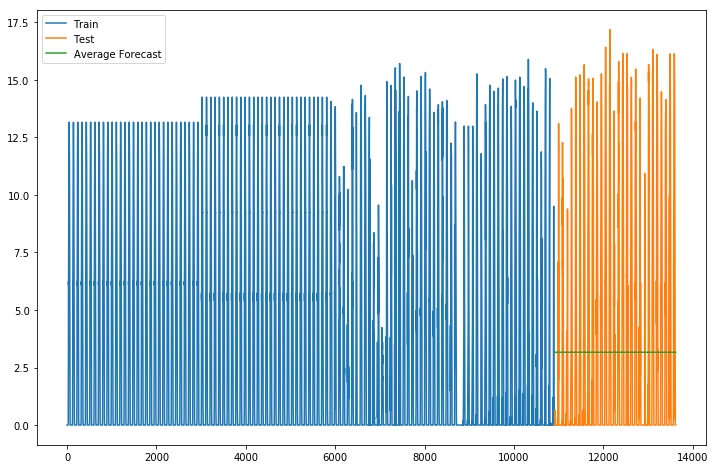

In [152]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['power'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [153]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.avg_forecast))
print(rms)

5.19236605666924


# Moving average

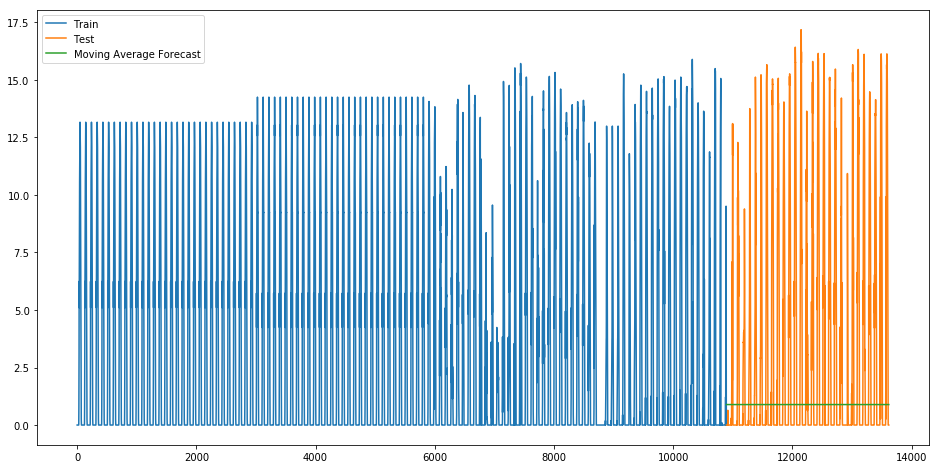

In [154]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['power'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [155]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.moving_avg_forecast))
print(rms)

5.7292646171095525


# Simple exponential smoothing 

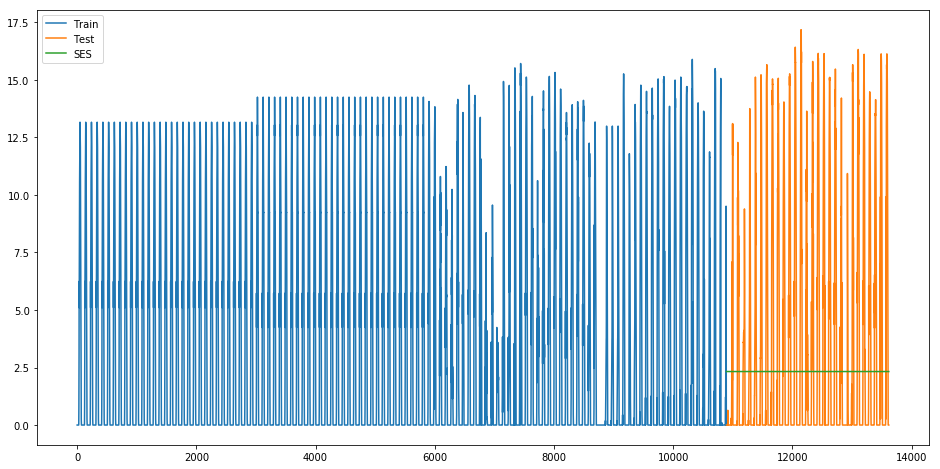

In [156]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['power'])).fit(smoothing_level=0.1,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [157]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.SES))
print(rms)

5.283940867391339


# HOLT'S Linear trend method

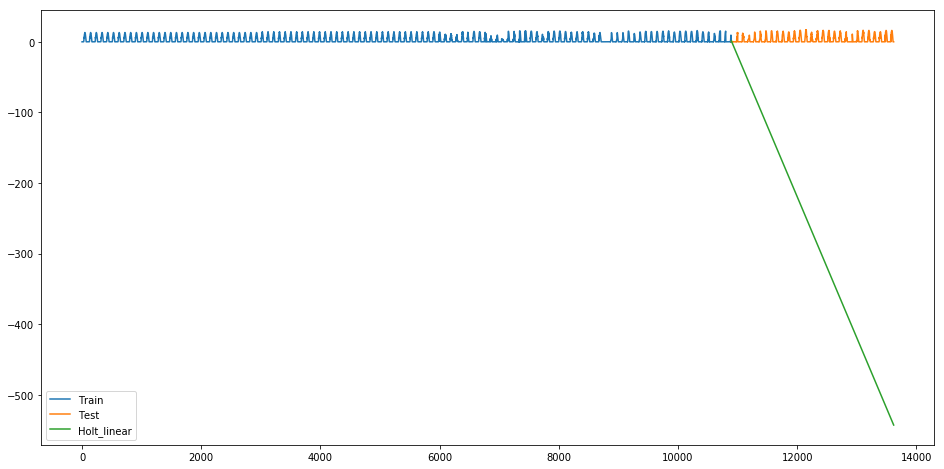

In [158]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['power'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [159]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.Holt_linear))
print(rms)

316.2736718199907


# Holt-winters method

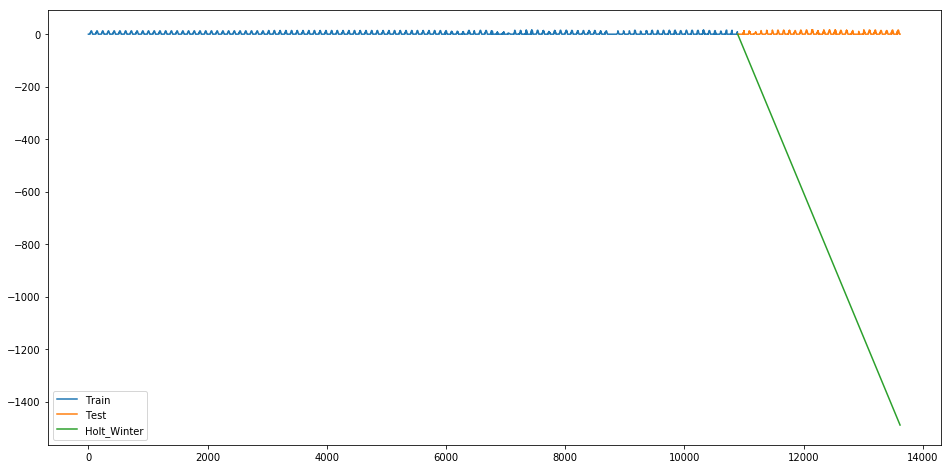

In [160]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['power']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['power'], label='Train')
plt.plot(test['power'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [161]:
rms = sqrt(mean_squared_error(test.power, y_hat_avg.Holt_Winter))
print(rms)

863.5179788559776


# ARIMA

In [162]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df3.power, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.power   No. Observations:                13618
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -16033.689
Method:                       css-mle   S.D. of innovations              0.785
Date:                Tue, 03 Dec 2019   AIC                          32077.379
Time:                        12:38:25   BIC                          32114.975
Sample:                             1   HQIC                         32089.912
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.272e-06      0.017     -0.000      1.000      -0.034       0.034
ar.L1.D.power     0.8839      0.007    133.385      0.000       0.871       0.897
ma.L1.D.power    -0.8589      0.011    -

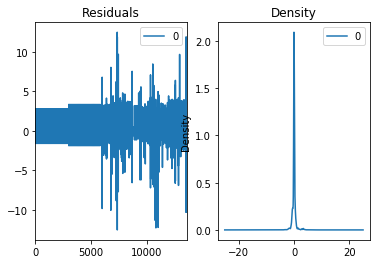

In [163]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

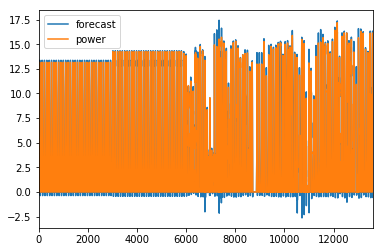

In [164]:
model_fit.plot_predict(dynamic=False)
plt.show()

# Now applying model on weather forecasted data

In [165]:
df2.drop('Unnamed: 0',inplace=True,axis=1)
df2.head(10)

,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
5,1,2019-09-30 23:30:00,2019-10-01 05:00:00,0.49,24.00,23,1,21.56,94,2.09,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
6,1,2019-10-01 00:30:00,2019-10-01 06:00:00,0.48,25.08,24,1,21.97,95,2.31,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
7,1,2019-10-01 01:30:00,2019-10-01 07:00:00,0.51,25.69,25,1,22.34,96,2.98,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-day,Humid and Mostly Cloudy,2019-10-02 23:32:38
8,1,2019-10-01 02:30:00,2019-10-01 08:00:00,0.59,26.22,25,1,22.35,99,3.44,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-day,Humid and Mostly Cloudy,2019-10-02 23:32:38
9,1,2019-10-01 03:30:00,2019-10-01 09:00:00,0.66,29.03,27,1,22.21,102,3.49,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-day,Mostly Cloudy,2019-10-02 23:32:38


In [166]:
df2.shape

df2.isnull().sum()


plant_id                  0
datetime_utc              0
datetime_local            0
cloud_cover               0
apparent_temperature      0
temperature               0
humidity                  0
dew_point                 0
wind_bearing              0
wind_speed                0
wind_chill              648
wind_gust                 0
heat_index              648
pressure                  0
qpf                     648
uv_index                  0
snow                    648
pop                     648
fctcode                 648
ozone                     0
precip_accumulation     648
precip_intensity          0
precip_probability        0
precip_type             534
visibility                0
sunrise                   0
sunset                    0
icon                      0
summary                   0
updated_at                0
dtype: int64

In [167]:
df2.drop(['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation','precip_type','updated_at','datetime_utc'],inplace=True,axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 20 columns):
plant_id                648 non-null int64
datetime_local          648 non-null object
cloud_cover             648 non-null float64
apparent_temperature    648 non-null float64
temperature             648 non-null int64
humidity                648 non-null int64
dew_point               648 non-null float64
wind_bearing            648 non-null int64
wind_speed              648 non-null float64
wind_gust               648 non-null float64
pressure                648 non-null float64
uv_index                648 non-null int64
ozone                   648 non-null float64
precip_intensity        648 non-null float64
precip_probability      648 non-null float64
visibility              648 non-null float64
sunrise                 648 non-null object
sunset                  648 non-null object
icon                    648 non-null object
summary                 648 non-null object
dtypes: fl

In [168]:
df2['datetime_local']=pd.to_datetime(df2['datetime_local'],infer_datetime_format=True) 
df2['sunrise']=pd.to_datetime(df2['sunrise'],infer_datetime_format=True)
df2['sunset']=pd.to_datetime(df2['sunset'],infer_datetime_format=True)

In [169]:
le=LabelEncoder()
df2['icon']=le.fit_transform(df2['icon'])

df2['summary']=le.fit_transform(df2['summary'])



df2.head()


,plant_id,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary
0,1,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4
1,1,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4
2,1,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4
3,1,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4
4,1,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4


In [170]:
df2['visibility']=df2['visibility'].apply(lambda x: np.NaN if x==-9999 else x)

df2['visibility'].fillna(df2['visibility'].mean(),inplace=True)

df2['uv_index']=df2['uv_index'].apply(lambda x: np.NaN if x==-9999 else x)

df2['uv_index'].fillna(df2['uv_index'].mean(),inplace=True)

df2['wind_gust']=df2['wind_gust'].apply(lambda x: np.NaN if x==-9999 else x)

df2['wind_gust'].fillna(df2['wind_gust'].mean(),inplace=True)

df2['precip_probability']=df2['precip_probability'].apply(lambda x: np.NaN if x==-9999 else x)

df2['precip_probability'].fillna(0,inplace=True)

df2['ozone']=df2['ozone'].apply(lambda x: np.NaN if x==-9999 else x)

df2['ozone'].fillna(df2['ozone'].mean(),inplace=True)

df2['precip_intensity']=df2['precip_intensity'].apply(lambda x: np.NaN if x==-9999 else x)

df2['precip_intensity'].fillna(df2['precip_intensity'].mean(),inplace=True)

df2['wind_bearing']=df2['wind_bearing'].apply(lambda x: np.NaN if x==-9999 else x)

df2['wind_bearing'].fillna(df2['wind_bearing'].mean(),inplace=True)

df2['wind_speed']=df2['wind_speed'].apply(lambda x: np.NaN if x==-9999 else x)

df2['wind_speed'].fillna(df2['wind_speed'].mean(),inplace=True)

df2['pressure']=df2['pressure'].apply(lambda x: np.NaN if x==-9999 else x)

df2['pressure'].fillna(df2['pressure'].mean(),inplace=True)

df2['cloud_cover']=df2['cloud_cover'].apply(lambda x: np.NaN if x==-9999 else x)

df2['cloud_cover'].fillna(df2['cloud_cover'].mean(),inplace=True)

In [171]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = df2.copy()
fit2 = SimpleExpSmoothing(np.asarray(df3['power'])).fit(smoothing_level=0.1,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(df2))

In [172]:
df2['power']=y_hat_avg['SES'] 

In [173]:
df2.head()

,plant_id,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,...,uv_index,ozone,precip_intensity,precip_probability,visibility,sunrise,sunset,icon,summary,power
0,1,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,...,0,268.6,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4,2.37602
1,1,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,...,0,269.1,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4,2.37602
2,1,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,...,0,269.7,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4,2.37602
3,1,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,...,0,270.4,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4,2.37602
4,1,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,...,0,271.3,0.0,0.0,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,4,4,2.37602
